---

_You are currently looking at **version 0.1** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the Jupyter Notebook FAQ course resource._

---

# Assignment 2

In this assignment you'll explore the relationship between model complexity and generalization performance, by adjusting key parameters of various supervised learning models. Part 1 of this assignment will look at regression and Part 2 will look at classification.

## Part 1 - Regression

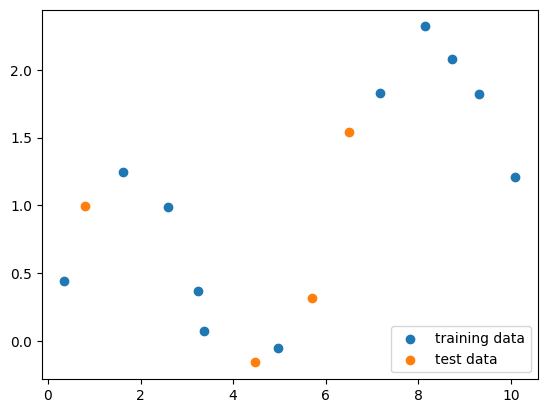

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


np.random.seed(0)
n = 15
x = np.linspace(0,10,n) + np.random.randn(n)/5
y = np.sin(x)+x/6 + np.random.randn(n)/10


X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)

def intro():

    plt.figure()
    plt.scatter(X_train, y_train, label='training data')
    plt.scatter(X_test, y_test, label='test data')
    plt.legend(loc=4);

intro()

### Question 1

Write a function that fits a polynomial LinearRegression model on the *training data* `X_train` for degrees 1, 3, 6, and 9. (Use PolynomialFeatures in sklearn.preprocessing to create the polynomial features and then fit a linear regression model) For each model, find 100 predicted values over the interval x = 0 to 10 (e.g. `np.linspace(0,10,100)`) and store this in a numpy array. The first row of this array should correspond to the output from the model trained on degree 1, the second row degree 3, the third row degree 6, and the fourth row degree 9.

<img src="assets/polynomialreg1.png" style="width: 1000px;"/>

The figure above shows the fitted models plotted on top of the original data (using `plot_one()`).

<br>
*This function should return a numpy array with shape `(4, 100)`*

In [3]:
def answer_one():
    from sklearn.linear_model import LinearRegression
    from sklearn.preprocessing import PolynomialFeatures
    
    degree_predictions = np.zeros((4,100))
    
    # YOUR CODE HERE
    predictions = np.zeros((4, 100))

    # Generate 100 values from 0 to 10 for prediction
    x_values = np.linspace(0, 10, 100).reshape(-1, 1)

    # Fit polynomial regression models for degrees 1, 3, 6, and 9
    for i, degree in enumerate([1, 3, 6, 9]):
        # Create polynomial features
        poly = PolynomialFeatures(degree=degree)
        X_poly_train = poly.fit_transform(X_train.reshape(-1, 1))
        x_values_poly = poly.transform(x_values)

        # Fit linear regression model
        model = LinearRegression()
        model.fit(X_poly_train, y_train)

        # Make predictions
        predictions[i, :] = model.predict(x_values_poly)

    return predictions
    raise NotImplementedError()


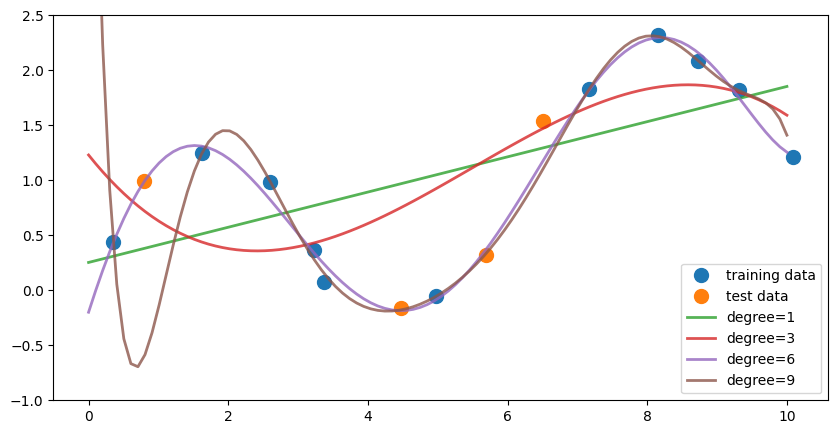

In [4]:
# feel free to use the function plot_one() to replicate the figure 
# from the prompt once you have completed question one
def plot_one(degree_predictions):
    plt.figure(figsize=(10,5))
    plt.plot(X_train, y_train, 'o', label='training data', markersize=10)
    plt.plot(X_test, y_test, 'o', label='test data', markersize=10)
    for i,degree in enumerate([1,3,6,9]):
        plt.plot(np.linspace(0,10,100), degree_predictions[i], alpha=0.8, lw=2, label='degree={}'.format(degree))
    plt.ylim(-1,2.5)
    plt.legend(loc=4)

plot_one(answer_one())


### Question 2

Write a function that fits a polynomial LinearRegression model on the training data `X_train` for degrees 0 through 9. For each model compute the $R^2$ (coefficient of determination) regression score on the training data as well as the the test data, and return both of these arrays in a tuple.

*This function should return a tuple of numpy arrays `(r2_train, r2_test)`. Both arrays should have shape `(10,)`*

In [5]:
def answer_two():
    from sklearn.linear_model import LinearRegression
    from sklearn.preprocessing import PolynomialFeatures
    from sklearn.metrics import r2_score

    r2_train = np.array([])
    r2_test = np.array([])
    
    # YOUR CODE HERE
    for degree in range(10):
        # Create polynomial features
        poly = PolynomialFeatures(degree=degree)
        X_poly_train = poly.fit_transform(X_train.reshape(-1, 1))
        X_poly_test = poly.transform(X_test.reshape(-1, 1))

        # Fit linear regression model
        model = LinearRegression()
        model.fit(X_poly_train, y_train)

        # Calculate R^2 scores for training and test data
        r2_train = np.append(r2_train, r2_score(y_train, model.predict(X_poly_train)))
        r2_test = np.append(r2_test, r2_score(y_test, model.predict(X_poly_test)))

    return r2_train, r2_test
    raise NotImplementedError()

### Question 3

Based on the $R^2$ scores from question 2 (degree levels 0 through 9), what degree level corresponds to a model that is underfitting? What degree level corresponds to a model that is overfitting? What choice of degree level would provide a model with good generalization performance on this dataset? 

(Hint: Try plotting the $R^2$ scores from question 2 to visualize the relationship)

*This function should return a tuple with the degree values in this order: `(Underfitting, Overfitting, Good_Generalization)`*

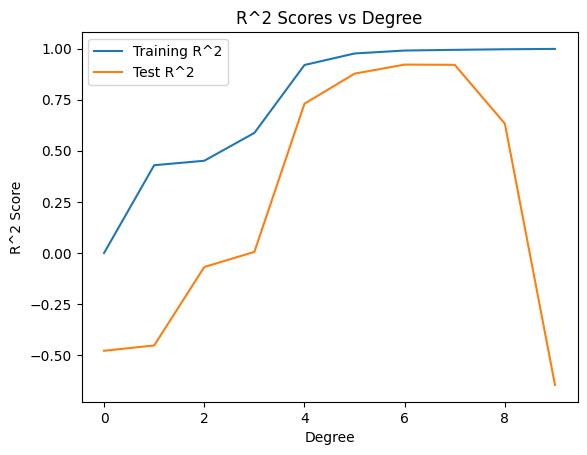

In [6]:
def answer_three():
    # YOUR CODE HERE
    r2_train, r2_test = answer_two()
    
    # Plot R^2 scores for visualization
    degrees = np.arange(10)
    plt.figure()
    plt.plot(degrees, r2_train, label='Training R^2')
    plt.plot(degrees, r2_test, label='Test R^2')
    plt.xlabel('Degree')
    plt.ylabel('R^2 Score')
    plt.title('R^2 Scores vs Degree')
    plt.legend()
    plt.show()
    
    # Determine degree levels for underfitting, overfitting, and good generalization
    underfitting_degree = np.argmin(r2_train)
    overfitting_degree = np.argmax(r2_train)
    best_degree = np.argmax(r2_test)
    
    return underfitting_degree, overfitting_degree, best_degree

# Call the function to get the degree levels
    raise NotImplementedError()
underfitting_degree, overfitting_degree, best_degree = answer_three()


### Question 4

Training models on high degree polynomial features can result in overfitting. Train two models: a non-regularized LinearRegression model and a Lasso Regression model (with parameters `alpha=0.01`, `max_iter=10000`, `tol=0.1`) on polynomial features of degree 12. Return the $R^2$ score for LinearRegression and Lasso model's test sets.

*This function should return a tuple `(LinearRegression_R2_test_score, Lasso_R2_test_score)`*

In [7]:
def answer_four():
    from sklearn.preprocessing import PolynomialFeatures
    from sklearn.linear_model import Lasso, LinearRegression
    from sklearn.metrics import r2_score
    
    # YOUR CODE HERE
    poly = PolynomialFeatures(degree=12)
    X_poly_train=poly.fit_transform(X_train.reshape(-1,1))
    X_poly_test=poly.fit_transform(X_test.reshape(-1,1))
    
    linear_reg=LinearRegression()
    linear_reg.fit(X_poly_train,y_train)
    linear_reg_r2=r2_score(y_test,linear_reg.predict(X_poly_test))
    
    
    lasso_reg=Lasso(alpha=0.01,max_iter=10000,tol=0.1)
    lasso_reg.fit(X_poly_train,y_train)
    lasso_reg_r2=r2_score(y_test,lasso_reg.predict(X_poly_test))
    
    return linear_reg_r2, lasso_reg_r2
    
    raise NotImplementedError()
answer_four()

(-4.31194716107414, 0.6051396919570093)

## Part 2 - Classification

For this section of the assignment we will be working with the [UCI Mushroom Data Set](http://archive.ics.uci.edu/ml/datasets/Mushroom?ref=datanews.io) stored in `mushrooms.csv`. The data will be used to trian a model to predict whether or not a mushroom is poisonous. The following attributes are provided:

*Attribute Information:*

1. cap-shape: bell=b, conical=c, convex=x, flat=f, knobbed=k, sunken=s 
2. cap-surface: fibrous=f, grooves=g, scaly=y, smooth=s 
3. cap-color: brown=n, buff=b, cinnamon=c, gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y 
4. bruises?: bruises=t, no=f 
5. odor: almond=a, anise=l, creosote=c, fishy=y, foul=f, musty=m, none=n, pungent=p, spicy=s 
6. gill-attachment: attached=a, descending=d, free=f, notched=n 
7. gill-spacing: close=c, crowded=w, distant=d 
8. gill-size: broad=b, narrow=n 
9. gill-color: black=k, brown=n, buff=b, chocolate=h, gray=g, green=r, orange=o, pink=p, purple=u, red=e, white=w, yellow=y 
10. stalk-shape: enlarging=e, tapering=t 
11. stalk-root: bulbous=b, club=c, cup=u, equal=e, rhizomorphs=z, rooted=r, missing=? 
12. stalk-surface-above-ring: fibrous=f, scaly=y, silky=k, smooth=s 
13. stalk-surface-below-ring: fibrous=f, scaly=y, silky=k, smooth=s 
14. stalk-color-above-ring: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y 
15. stalk-color-below-ring: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y 
16. veil-type: partial=p, universal=u 
17. veil-color: brown=n, orange=o, white=w, yellow=y 
18. ring-number: none=n, one=o, two=t 
19. ring-type: cobwebby=c, evanescent=e, flaring=f, large=l, none=n, pendant=p, sheathing=s, zone=z 
20. spore-print-color: black=k, brown=n, buff=b, chocolate=h, green=r, orange=o, purple=u, white=w, yellow=y 
21. population: abundant=a, clustered=c, numerous=n, scattered=s, several=v, solitary=y 
22. habitat: grasses=g, leaves=l, meadows=m, paths=p, urban=u, waste=w, woods=d

<br>

The data in the mushrooms dataset is currently encoded with strings. These values will need to be encoded to numeric to work with sklearn. We'll use pd.get_dummies to convert the categorical variables into indicator variables. 

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split


mush_df = pd.read_csv('assets/mushrooms.csv')
mush_df2 = pd.get_dummies(mush_df)

X_mush = mush_df2.iloc[:,2:]
y_mush = mush_df2.iloc[:,1]


X_train2, X_test2, y_train2, y_test2 = train_test_split(X_mush, y_mush, random_state=0)

### Question 5

Using `X_train` and `y_train` from the preceeding cell, train a DecisionTreeClassifier with default parameters and random_state=0. What are the 5 most important features found by the decision tree?

*This function should return a list of length 5 of the feature names in descending order of importance.*

In [3]:
def answer_five():
    from sklearn.tree import DecisionTreeClassifier
    
    # YOUR CODE HERE
    clf = DecisionTreeClassifier(random_state=0)
    clf.fit(X_train2, y_train2)
    
    # Get feature importances
    feature_importances = clf.feature_importances_
    
    # Create a DataFrame to map feature importances to feature names
    feature_names = X_train2.columns
    feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
    
    # Sort the DataFrame by feature importances in descending order
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
    
    # Get the top 5 most important features
    top_features = feature_importance_df['Feature'].head(5).tolist()
    
    return top_features
    raise NotImplementedError()
top_features = answer_five()
print(top_features)

['odor_n', 'stalk-root_c', 'stalk-root_r', 'spore-print-color_r', 'odor_l']


### Question 6

For this question, use the `validation_curve` function in `sklearn.model_selection` to determine training and test scores for a Support Vector Classifier (`SVC`) with varying parameter values.

Create an `SVC` with default parameters (i.e. `kernel='rbf', C=1`) and `random_state=0`. Recall that the kernel width of the RBF kernel is controlled using the `gamma` parameter.  Explore the effect of `gamma` on classifier accuracy by using the `validation_curve` function to find the training and test scores for 6 values of `gamma` from `0.0001` to `10` (i.e. `np.logspace(-4,1,6)`).

For each level of `gamma`, `validation_curve` will use 3-fold cross validation (use `cv=3, n_jobs=2` as parameters for `validation_curve`), returning two 6x3 (6 levels of gamma x 3 fits per level) arrays of the scores for the training and test sets in each fold.

Find the mean score across the five models for each level of `gamma` for both arrays, creating two arrays of length 6, and return a tuple with the two arrays.

e.g.

if one of your array of scores is

    array([[ 0.5,  0.4,  0.6],
           [ 0.7,  0.8,  0.7],
           [ 0.9,  0.8,  0.8],
           [ 0.8,  0.7,  0.8],
           [ 0.7,  0.6,  0.6],
           [ 0.4,  0.6,  0.5]])
       
it should then become

    array([ 0.5,  0.73333333,  0.83333333,  0.76666667,  0.63333333, 0.5])

*This function should return a tuple of numpy arrays `(training_scores, test_scores)` where each array in the tuple has shape `(6,)`.*

In [4]:
def answer_six():
    from sklearn.svm import SVC
    from sklearn.model_selection import validation_curve
    # YOUR CODE HERE
     # Create SVC with default parameters
    svc = SVC(kernel='rbf', C=1, random_state=0)
    
    # Define range of gamma values
    gamma_range = np.logspace(-4, 1, 6)
    
    # Compute validation curves
    train_scores, test_scores = validation_curve(
        svc, X_test2, y_test2,
        param_name='gamma', param_range=gamma_range,
        cv=3, n_jobs=2
    )
    
    # Compute mean scores across folds for each gamma value
    mean_train_scores = np.mean(train_scores, axis=1)
    mean_test_scores = np.mean(test_scores, axis=1)
    
    return mean_train_scores, mean_test_scores
    raise NotImplementedError()
answer_six()

(array([0.56646972, 0.93106844, 0.990645  , 1.        , 1.        ,
        1.        ]),
 array([0.56720827, 0.9300837 , 0.98966027, 1.        , 0.99458395,
        0.52240276]))

### Question 7

Based on the scores from question 6, what gamma value corresponds to a model that is underfitting? What gamma value corresponds to a model that is overfitting? What choice of gamma would provide a model with good generalization performance on this dataset? 

(Hint: Try plotting the scores from question 6 to visualize the relationship)

*This function should return a tuple with the degree values in this order: `(Underfitting, Overfitting, Good_Generalization)`*

In [7]:
def answer_seven():
        # YOUR CODE HERE

    param_range = np.logspace(-4, 1, 6)

    # Read in the results of answer_six
    training_scores, test_scores = answer_six()

    # Sort the scores
    train_scores_sorted = np.sort(training_scores)
    test_scores_sorted = np.sort(test_scores)

    # Initialize the values
    Underfitting = 0
    Overfitting = 0
    Good_Generalization = 0

    for gam, data in zip(param_range, zip(training_scores, test_scores)):
        if data[0] <= train_scores_sorted[1] and data[1] <= test_scores_sorted[1]:
            Underfitting = gam
        if data[0] > train_scores_sorted[1] and data[1] <= test_scores_sorted[1]:
            Overfitting = gam
        if data[0] == np.max(training_scores) and data[1] == np.max(test_scores):
            Good_Generalization = gam

    return Underfitting, Overfitting, Good_Generalization
    raise NotImplementedError()
underfitting_gamma, overfitting_gamma, good_generalization_gamma = answer_seven()
print("Underfitting gamma:", underfitting_gamma)
print("Overfitting gamma:", overfitting_gamma)
print("Good generalization gamma:", good_generalization_gamma)

Underfitting gamma: 0.0001
Overfitting gamma: 10.0
Good generalization gamma: 0.1
